In [103]:
from sklearn.linear_model import LinearRegression as SkLinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Analysis Internship\Datasets\student_scores.csv')
print("size:",data.size,"; shape",data.shape)
data.head(10)

size: 50 ; shape (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


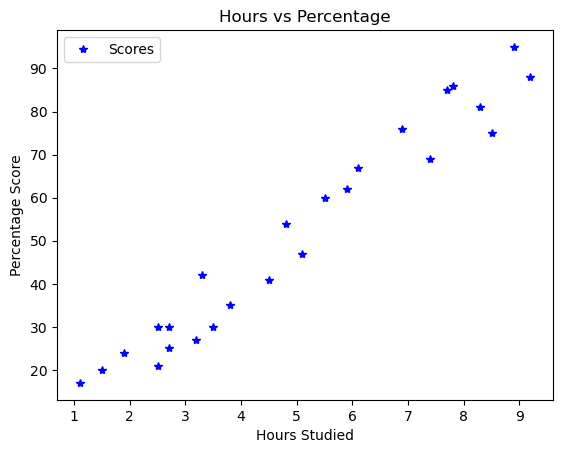

In [105]:
data.plot(x='Hours', y='Scores', style='*', c="blue")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [106]:
X = data.iloc[:,:-1]
y = data.iloc[:, 1]

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train.values, y_train)
print("Training Completed ✔")

Training Completed ✔


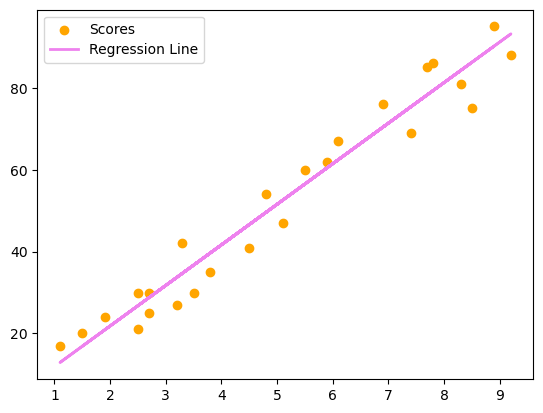

In [109]:
y_line = lin_regressor.coef_ * X + lin_regressor.intercept_
plt.scatter(X, y, c="orange", label="Scores")
plt.plot(X, y_line, c="violet", linewidth=2, label="Regression Line")
plt.legend()
plt.show()

In [110]:
print("Testing Data\n"+"-"*13, X_test, sep='\n')
y_pred = lin_regressor.predict(X_test.values)

Testing Data
-------------
    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [111]:
print(" Comparing Actual Vs. Predicted ".center(45, "*"))
temp = pd.DataFrame(
    {
        'Actual':y_test,
        'Predicted':y_pred
    }
)
temp

******* Comparing Actual Vs. Predicted ******


,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [112]:
hours = 9.25
own_pred = lin_regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [125]:
print(f"Mean Squared Error is : {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score is : {lin_regressor.score(X_test.values, y_test)}")

Mean Squared Error is : 21.5987693072174
R2 Score is : 0.9454906892105356
